In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer


In [2]:
trainset = "C:/Users/Aditya/Downloads/rps"
testset = "C:/Users/Aditya/Downloads/rps-test-set"

data_gen = ImageDataGenerator(
    rescale= 1/255,        
    horizontal_flip=True,
    vertical_flip = True,
    validation_split = 0.2
)  

train_gen = data_gen.flow_from_directory(
    trainset,
    target_size = (300,300),
    batch_size=32,
    class_mode = 'categorical',
    shuffle=True,
)

test_gen = data_gen.flow_from_directory(
    testset,
    target_size=(300,300),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset = 'validation'
)

Found 2520 images belonging to 3 classes.
Found 72 images belonging to 3 classes.


In [3]:
cnn = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300,300, 3),use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu',use_bias=True),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu',use_bias=True),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu',use_bias=True),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
   
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
  
    tf.keras.layers.Dense(512, activation = 'relu', use_bias=True),
    tf.keras.layers.Dense(3, activation='softmax', use_bias=True)
    
])

In [4]:
# model.summary()

In [5]:
cnn.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
cnn_fit = cnn.fit(train_gen, epochs=20, validation_data = test_gen, verbose = 1)

Epoch 1/20
79/79 [==============================] - 337s 4s/step - loss: 0.7519 - accuracy: 0.6750 - val_loss: 0.7438 - val_accuracy: 0.6806
Epoch 2/20
79/79 [==============================] - 358s 5s/step - loss: 0.0987 - accuracy: 0.9631 - val_loss: 0.2347 - val_accuracy: 0.9444
Epoch 3/20
79/79 [==============================] - 363s 5s/step - loss: 0.0531 - accuracy: 0.9865 - val_loss: 0.1155 - val_accuracy: 0.9444
Epoch 4/20
79/79 [==============================] - 362s 5s/step - loss: 0.0428 - accuracy: 0.9873 - val_loss: 0.0514 - val_accuracy: 0.9722
Epoch 5/20
79/79 [==============================] - 360s 5s/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.4397 - val_accuracy: 0.8889
Epoch 6/20
79/79 [==============================] - 361s 5s/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 7/20
79/79 [==============================] - 362s 5s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 8/20
79

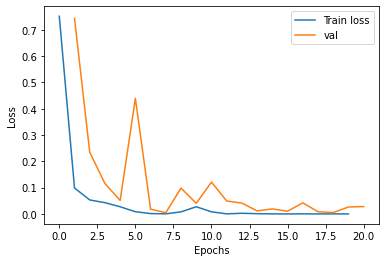

In [6]:
Epochs = np.arange(1,21)

# plt.plot(Epochs, cnn_fit.cnn_fit['loss'],label='train')
plt.plot(cnn_fit.epoch, cnn_fit.cnn_fit["loss"], label="Train loss")
plt.plot(Epochs, cnn_fit.cnn_fit['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

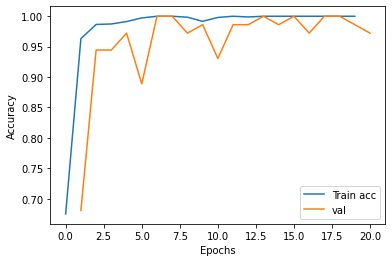

In [7]:
# plt.plot(Epochs, cnn_fit.cnn_fit['accuracy'],label='train') 
plt.plot(cnn_fit.epoch, cnn_fit.cnn_fit["accuracy"], label="Train acc")
plt.plot(Epochs, cnn_fit.cnn_fit['val_accuracy'], label='val')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')  
plt.legend()